# Assignment 1

---
Little analysis of titanic data.

---

### 1. Check what features are available in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
df = pd.read_csv('train.csv', index_col = 0)

In [4]:
df.isnull().sum()  # how many cells are empty

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
df['Survived'] = df['Survived'].astype('category')  # categorization 
df['Survived'].describe()

count     891
unique      2
top         0
freq      549
Name: Survived, dtype: int64

In [7]:
df['Pclass'] = df['Pclass'].astype('category')
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

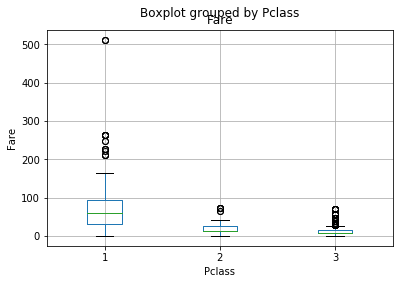

In [8]:
df.boxplot(column='Fare', by='Pclass')  # What is the average fare for each class
plt.ylabel('Fare')
plt.show()

In [9]:
df['Name'].describe()  # to make sure whether name is unique

count                      891
unique                     891
top       Sadlier, Mr. Matthew
freq                         1
Name: Name, dtype: object

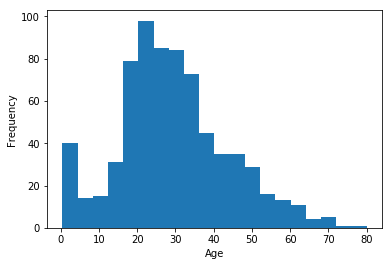

In [10]:
df['Age'].plot.hist(bins=20)
plt.xlabel('Age')
plt.show()
# Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

In [11]:
# The first bin is very tall. Are there any zeros?
sum(df['Age'] == 0)

0

In [12]:
df['SibSp'] = df['SibSp'].astype('category')  # travelled with siblings/spouse
df.groupby('SibSp').size()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [13]:
df['Parch'] = df['Parch'].astype('category')  # travelled with parents/children
df.groupby('Parch').size()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [14]:
df.groupby('Embarked').size()
# Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

Embarked
C    168
Q     77
S    644
dtype: int64

### 2. Clean the data if required.

### 3. Create a pie chart presenting the male/female proportion.

In [15]:
sex_prop = df.groupby(by='Sex').size()
sex_prop.name = 'sex proportion'

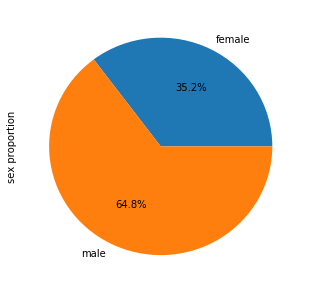

In [16]:
sex_prop.plot.pie(y='Sex', figsize=(5,5), autopct='%1.1f%%')
plt.show()

There were almost twice as many men as women.

### 4. Create a scatterplot with the “Fare payed” and the “Age”, differ the plot color by gender.

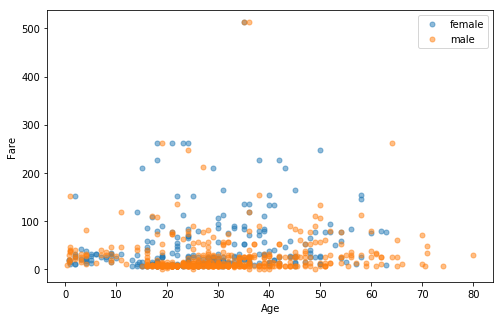

In [54]:
group_sex = df.groupby('Sex')

fig, ax = plt.subplots(figsize=(8,5))
for name, group in group_sex:
    ax.plot(group.Age, group.Fare, marker = '.', linestyle='', ms=10, label=name, alpha = 0.5)
ax.legend()
plt.ylabel('Fare')
plt.xlabel('Age')

plt.show()

No visible correlation between Age and Fare, as well as no gender division.

How to effectively fill the missing age cells?

In [18]:
df[['Sex','Age']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


In [19]:
df[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [20]:
pd.crosstab(df.Pclass, df.Sex)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


for example, if there is missing an age of a woman from 1st class, I will take mean(28,38) as her age

In [21]:
sex_dict = {'female':28, 'male':31}
pclass_dict = {1:38, 2:30, 3:25}
age_based_on_sex = df['Sex'].map(sex_dict)
age_based_on_pclass = df['Pclass'].map(pclass_dict)
avg_age = np.mean([age_based_on_sex, age_based_on_pclass], axis=0)

In [22]:
df_filled = df.copy()
df_filled['Age'] = df_filled['Age'].fillna(value=pd.Series(avg_age, index=df.index))

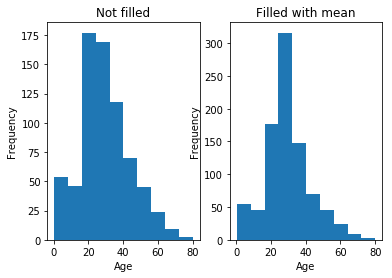

In [25]:
plt.figure()
plt.subplot(121)
df['Age'].plot.hist(bins=10)
plt.xlabel('Age')
plt.title('Not filled')

plt.subplot(122)
df_filled['Age'].plot.hist(bins=10)
plt.xlabel('Age')
plt.title('Filled with mean')

plt.show()

But it looks like it changes the distribution a lot... Let's assume normal distribution of age for both genders and fill the gaps with simulated random numbers.

In [28]:
df[['Sex','Age']].groupby('Sex').agg(['mean','std'])

Age           
             mean        std
Sex                         
female  27.915709  14.110146
male    30.726645  14.678201

In [29]:
df['woman_random_age'] = abs(np.random.normal(28,10,891))  # taking smaller sd not to get many negative values
df['man_random_age'] = abs(np.random.normal(31,10,891))

In [30]:
sum(df['man_random_age']<=0)

0

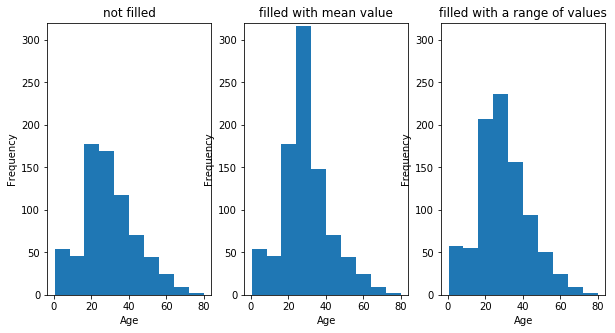

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(131)
df['Age'].plot.hist(bins=10)
plt.ylim((0,320))
plt.title('not filled')
plt.xlabel('Age')

plt.subplot(132)
df_filled['Age'].plot.hist(bins=10)
plt.ylim((0,320))
plt.title('filled with mean value')
plt.xlabel('Age')

plt.subplot(133)
df_filled2['Age'].plot.hist(bins=10)
plt.ylim((0,320))
plt.title('filled with a range of values')
plt.xlabel('Age')

plt.show()

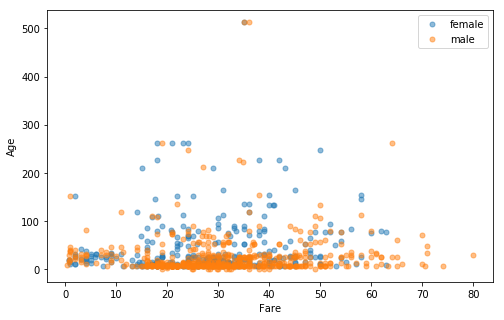

In [33]:
group_sex_filled = df_filled2.groupby('Sex')

fig, ax = plt.subplots(figsize=(8,5))
for name, group in group_sex_filled:
    ax.plot(group.Age, group.Fare, marker = '.', linestyle='', ms=10, label=name, alpha = 0.5)
ax.legend()
plt.xlabel('Fare')
plt.ylabel('Age')

plt.show()

### 5. Check how many people survived.

In [34]:
df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [35]:
len(df[df['Survived']==1]) / len(df)  # proportion of survived

0.3838383838383838

In [36]:
pd.crosstab(df.Survived, df.Sex)  # difference in survival rate for different genders

Sex,female,male
Survived,,
0,81,468
1,233,109


### 6. Create a histogram with the ’Fare payed’.

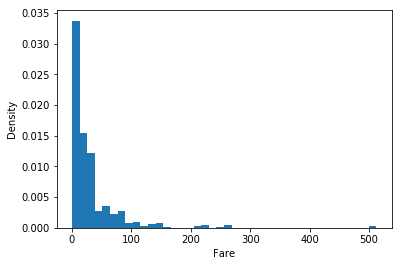

In [37]:
df['Fare'].plot.hist(bins=40, normed=True)
plt.ylabel('Density')
plt.xlabel('Fare')
plt.show()

Just a few extreme values. Later we will see what it is correlated with.

### 7. Create your own questions and answer them!

#### Was is better to be alone onboard or with family?

In [38]:
df['not_alone'] = df['SibSp'].astype(int) + df['Parch'].astype(int)
df['not_alone'] = df['not_alone'].where(df['not_alone'] == 0, 1)
df['Survived'] = df['Survived'].astype(int)
df[['Survived','not_alone']].groupby('not_alone').mean()


,Survived
not_alone,
0,0.303538
1,0.505650


Survival rate for those who travelled with family is higher!

#### Did the gender influence the fare paid?

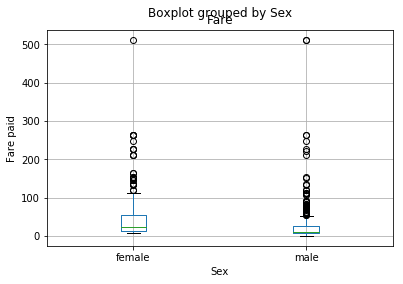

In [39]:
df.boxplot(column='Fare',by='Sex')
plt.ylabel('Fare paid')
plt.show()

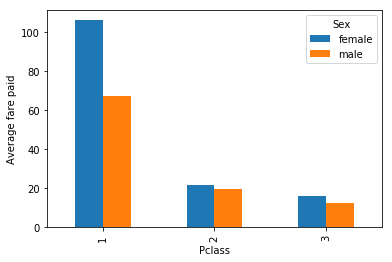

In [40]:
df.groupby(['Sex', 'Pclass'])['Fare'].mean().unstack(0).plot.bar()
plt.ylabel('Average fare paid')
plt.show()

Generally women paid more, no matter in which class they travelled.

#### Does the gender impacts on survival?

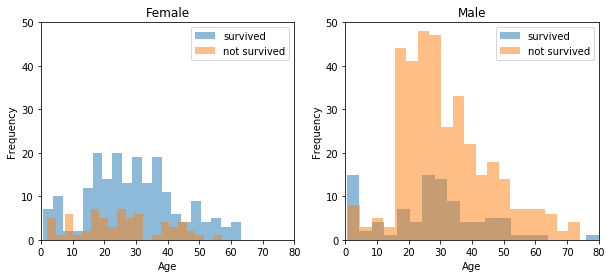

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']

plt.subplot(121)
ax = women[women['Survived']==1].Age.plot.hist(bins=20, label = 'survived', alpha = 0.5)
ax = women[women['Survived']==0].Age.plot.hist(bins=20, label = 'not survived', alpha = 0.5)
ax.legend()
ax.set_title('Female')
ax.set_xlabel('Age')
ax.set_xlim([0, 80])
ax.set_ylim([0, 50])

plt.subplot(122)
ax = men[men['Survived']==1].Age.plot.hist(bins=20, label = 'survived', alpha = 0.5)
ax = men[men['Survived']==0].Age.plot.hist(bins=20, label = 'not survived', alpha = 0.5)
ax.legend()
ax.set_xlim([0, 80])
ax.set_ylim([0, 50])
ax.set_title('Male')
ax.set_xlabel('Age')

plt.show()

Women were more likely to survive.

#### Pclass vs survival

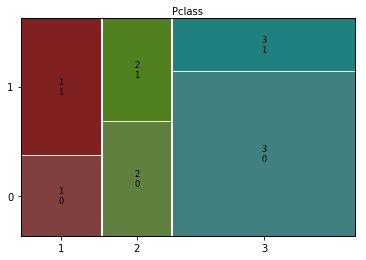

In [42]:
mosaic(df.sort_values('Pclass'), ['Pclass','Survived'])
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

Of course bigger percentage of first class passengers survived, and majority of third class passengers died.

#### Fare paid vs survival

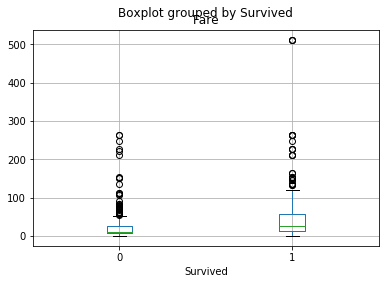

In [43]:
df.boxplot(column='Fare',by='Survived')
plt.show()

Fare has no discriminating ability.

#### Age vs Fare

In [44]:
df_filled2[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.079729
Fare,0.079729,1.000000


In [45]:
df[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


No correlation between Age and Fare.

#### Survival prediction

Logistic regression using Pclass, Age and Sex as independent variables.

In [46]:
df_filled2['male'] = [1 if row == 'male' else 0 for row in df_filled2['Sex']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_filled2[['Pclass','Age','male']], 
                                                    df_filled2['Survived'], test_size=0.30, 
                                                    random_state=101)

In [47]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.88      0.81       154
          1       0.80      0.61      0.69       114

avg / total       0.77      0.77      0.76       268



In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[136,  18],
       [ 44,  70]], dtype=int64)

What if we take into account additionaly Fare paid?

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_filled2[['Pclass','Age','male','Fare']], 
                                                    df_filled2['Survived'], test_size=0.30, 
                                                    random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.85      0.80       154
          1       0.76      0.63      0.69       114

avg / total       0.76      0.76      0.75       268



In [51]:
confusion_matrix(y_test, predictions)

array([[131,  23],
       [ 42,  72]], dtype=int64)

It didn't really improve the results. What if we add 'not_alone' feature?

In [52]:
df_filled2['not_alone'] = df['not_alone']
X_train, X_test, y_train, y_test = train_test_split(df_filled2[['Pclass','Age','male','Fare','not_alone']], 
                                                    df_filled2['Survived'], test_size=0.30, 
                                                    random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.85      0.80       154
          1       0.76      0.63      0.69       114

avg / total       0.76      0.76      0.75       268



In [53]:
confusion_matrix(y_test, predictions)

array([[131,  23],
       [ 42,  72]], dtype=int64)

No difference.